(483, 350, 3)


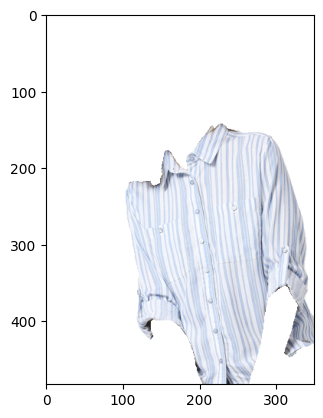

In [108]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation , AutoFeatureExtractor
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from typing import Dict, List, Any
import numpy as np
import cv2

processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")
# feature_extractor = AutoFeatureExtractor.from_pretrained("mattmdjaga/segformer_b2_clothes")

url = "https://d1pdzcnm6xgxlz.cloudfront.net/tops/8905074863310-18.jpg"

#write function that reads the csv and then open the image from the disk

image = Image.open(requests.get(url, stream=True).raw)

# encoding = feature_extractor(images=image, return_tensors="pt")
# pixel_values = encoding["pixel_values"]
# with torch.no_grad():
# 	outputs = model(pixel_values=pixel_values)


inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)



logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
	logits,
	size=image.size[::-1],
	mode="bilinear",
	align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]


# def createMask(pred_seg , value):
	# output = []
	# for i in pred_seg:
	# 	temp = []
	# 	for j in i:
	# 		if j == value:
	# 			temp.append(1)
	# 		else:
	# 			temp.append(0)
	
	# 	output.append(temp)
	# return output


#write a function to create mask for different classes and then apply the mask to the image

pred_seg[pred_seg != 4] = 0
pred_seg[pred_seg == 4] = 1



def apply_mask(image, mask):
	# Convert to numpy arrays
	image = np.array(image)
	mask = np.array(mask)
	# Convert grayscale image to RGB
	mask = np.stack((mask,)*3, axis=-1)
	# Multiply arrays
	resultant = image*mask
	print(resultant.shape)
	resultant[mask == 0] = 255

	return resultant

#write funtion to write the numpy array image to the disk 
def write_image(image, path):
	image = Image.fromarray(np.uint8(image))
	image.save(path)


resultant = apply_mask(image, pred_seg)
plt.imshow(resultant)


#use opencv contour to crop the resultant image

def crop_image(image):
	#convert to grayscale
	temp = image[:, :, ::-1].copy() 
	temp = temp.astype('uint8')
	gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
	#threshold the image
	thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
	#find contours
	contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
	#find bounding box coordinates
	contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
	x,y,w,h = cv2.boundingRect(contours[0])
	#crop image
	crop = image[y:y+h, x:x+w]
	return crop

# resultant = crop_image(resultant)

write_image(resultant, "top_wear.png")

plt.imshow(resultant)

c:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 